# ✅ **ETAPA 1: Instalación de librerías necesarias**

# Explicación:






*   imbalanced-learn: para aplicar técnicas como SMOTE, que genera nuevos datos sintéticos en clases minoritarias.
*   scikeras: permite integrar modelos de Keras con herramientas de scikit-learn, como GridSearchCV.


*   openpyxl: necesario para leer archivos Excel .xlsx.


# ¿Qué hace esta etapa?
En proyectos de clasificación con clases desbalanceadas, como puede ser una calificación ordinal (bajo, medio bajo, medio alto, alto), SMOTE (Synthetic Minority Over-sampling Technique) es una técnica que genera ejemplos sintéticos de las clases minoritarias para evitar que el modelo se sesgue hacia las mayoritarias.

**¿Por qué es importante esta etapa?**
Un proyecto de clasificación con clases desbalanceadas (por ejemplo, "bajo", "medio", "alto") puede generar modelos sesgados. SMOTE crea ejemplos sintéticos en las clases minoritarias para mejorar la capacidad del modelo de generalizar.

In [ ]:

# Se instalan las librerías necesarias para balanceo, integración de modelos de Keras con scikit-learn, y lectura de Excel.
!pip install -q imbalanced-learn scikeras openpyxl

# **✅ ETAPA 2: Importar librerías**

# ¿Por qué es necesaria esta etapa?

**Importamos todas las herramientas requeridas para:**
*   Cargar y manipular datos (pandas, numpy).
*   Construir modelos y preprocesar datos: scikit-learn, SMOTE, ColumnTransformer, Pipeline, etc.



*   Construir redes neuronales: keras (generalmente tensorflow.keras).
*   Evaluar modelos: classification_report, confusion_matrix, accuracy_score, etc.



*   Optimizar modelos: GridSearchCV.


















In [ ]:
# Importamos todas las herramientas necesarias para el preprocesamiento, modelado, evaluación y visualización.
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

Estas herramientas provienen de scikit-learn y permiten:

Dividir datos en entrenamiento y prueba.

Transformar columnas (categóricas y numéricas) con ColumnTransformer.

Estandarizar variables (StandardScaler) o codificar categorías (OneHotEncoder).

Evaluar el modelo con reportes y matrices de confusión.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Aquí entramos en materia avanzada:

SMOTE: genera ejemplos sintéticos de las clases minoritarias.

Keras y Model: permiten construir redes neuronales personalizadas.

KerasClassifier: puente entre Keras y scikit-learn para integrarlo en pipelines y validación cruzada.

In [ ]:
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from scikeras.wrappers import KerasClassifier

# **✅ ETAPA 3: Carga y preparación de datos**

# Explicación:

**¿Por qué hacemos esto?**
wget descarga el archivo desde tu repositorio.


*   Cargamos la hoja correcta con pandas.
*   Restamos 1 al target para tener clases 0, 1, 2, 3 (más fácil de manejar con redes neuronales).


*   Eliminamos filas con datos faltantes que puedan afectar el entrenamiento del modelo.













In [ ]:
# Se descarga y lee el archivo de datos directamente desde GitHub.
!wget -O "BD_ENLA_2024.xlsx" "https://github.com/JeancarloSZR/Reto3/raw/86ce0056c05e84486732c501ea3446955ae981f3/BD_6P%20ENLA%20muestral%202024.xlsx"
df = pd.read_excel("BD_ENLA_2024.xlsx", sheet_name="BD")

--2025-05-15 02:19:59--  https://github.com/JeancarloSZR/Reto3/raw/86ce0056c05e84486732c501ea3446955ae981f3/BD_6P%20ENLA%20muestral%202024.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeancarloSZR/Reto3/86ce0056c05e84486732c501ea3446955ae981f3/BD_6P%20ENLA%20muestral%202024.xlsx [following]
--2025-05-15 02:20:00--  https://raw.githubusercontent.com/JeancarloSZR/Reto3/86ce0056c05e84486732c501ea3446955ae981f3/BD_6P%20ENLA%20muestral%202024.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9993837 (9.5M) [application/octet-stream]
Saving to: ‘BD_ENLA_2024.xlsx’

BD_ENLA_2024.xlsx   100%[

# **✅ ETAPA 4: Selección y Preprocesamiento de Variables**

**¿Qué se hace aquí?**

Se define la variable objetivo (target) y las variables predictoras (features).

Se eliminan filas con valores nulos en esas columnas, para evitar errores durante el entrenamiento.

Se convierte el target a entero y se resta 1 para que las clases vayan de 0 a 3 (ordinales). Esto es útil para modelos que trabajan con clases indexadas desde cero, como las redes neuronales en Keras.

In [ ]:

target = 'grupo_EM_6P_2024_MA'
features = ['sexo', 'area', 'gestion2', 'M500_EM_6P_2024_CT', 'grupo_EM_6P_2024_CT']

# Primero, eliminar las filas con NaNs en las columnas relevantes
df = df.dropna(subset=[target] + features)

# Luego, convertir la columna target a entero y restarle 1
df[target] = df[target].astype(int) - 1

# **✅ ETAPA 5: División de los Datos y Revisión de Balance**
**¿Qué se hace aquí?**

Se separan los datos en entrenamiento (70%) y prueba (30%).

Se usa stratify=y para mantener la misma proporción de clases en ambos conjuntos.

Se imprime la distribución de clases para observar si hay desbalance (clases poco representadas).

# Resultado:
*La clase 1 tiene más del doble que la clase 3. Aquí es donde entra SMOTE*

In [ ]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
print("Distribución de clases:", Counter(y_train))

Distribución de clases: Counter({1: 27430, 2: 20689, 0: 12233, 3: 10310})


# **✅ ETAPA 6: Codificación Ordinal por Umbrales**
**¿Qué hace esta función?**

Convierte una variable ordinal (por ejemplo, clase 2) en una representación binaria secuencial, así:


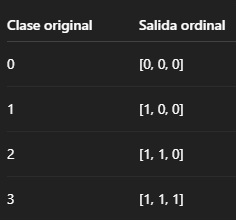

Esto refleja que clase 3 > clase 2 > clase 1 > clase 0. Es útil para entrenar redes que respeten el orden natural de las categorías.

In [ ]:
def ordinal_coding(y, num_classes=4):
    y_ord = np.zeros((len(y), num_classes - 1))
    for i in range(num_classes - 1):
        y_ord[:, i] = (y > i).astype(int)
    return y_ord

Se aplica la codificación anterior a los datos de entrenamiento y prueba.

In [ ]:
y_train_ord = ordinal_coding(y_train)
y_test_ord = ordinal_coding(y_test)

# **✅ ETAPA 7: Preprocesamiento de Datos**

¿Qué se hace aquí?

Se separan las variables categóricas y numéricas.

Se define un ColumnTransformer para que:

Las variables numéricas sean escaladas (media 0, desviación estándar 1).

Las categóricas se conviertan en vectores binarios (OneHotEncoding).



> Esto asegura que todas las variables estén en un formato adecuado para el modelo.





In [ ]:
# ETAPA 7: Preprocesamiento de Datos
# -----------------------------------------------
cat_cols = ['sexo', 'area', 'gestion2']
num_cols = ['M500_EM_6P_2024_CT', 'grupo_EM_6P_2024_CT']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# **✅ ETAPA 8: Aplicación de SMOTE**


> Se transforman las variables con el preprocessor creado en la etapa 7.



In [ ]:
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

# ¿Qué se hace aquí?

Se aplica SMOTE sobre los datos de entrenamiento ya transformados (X_train_pre, y_train).

Se genera una nueva versión balanceada (X_resampled, y_resampled) donde las clases están igualadas.

Luego, y_resampled se convierte en formato ordinal binario con la función ordinal_coding.

**📌 Importancia:** el modelo podrá aprender mejor ya que no estará sesgado hacia clases mayoritarias.

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_pre, y_train)
y_resampled_ord = ordinal_coding(y_resampled)

# **✅ ETAPA 9: Definición del Modelo Keras Ordinal**
¿Qué construye esto?

Una red neuronal para clasificación ordinal:

Capa de entrada ajustada al número de variables (después de codificarlas).

2 capas ocultas densas (Dense) con activación relu.

Capa de salida con 3 neuronas y sigmoid, que representa los 3 umbrales de clases ordinales.

Se usa binary_crossentropy porque cada umbral es un problema binario (por ejemplo: "¿estás por encima de clase 0?").

In [ ]:
def build_model_ordinal(units=32, activation='relu'):
    inputs = Input(shape=(X_resampled.shape[1],))
    x = Dense(units, activation=activation)(inputs)
    x = Dense(units, activation=activation)(x)
    outputs = Dense(3, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# **✅ ETAPA 10: Entrenamiento del Modelo**
Se entrena el modelo usando:

10 épocas (iteraciones completas sobre los datos).

20% de los datos se reservan para validación durante el entrenamiento.

Se guarda el history para luego graficar curvas de aprendizaje.



> 📌 Resultado: *El modelo parece alcanzar rápidamente accuracy: 1.0 porque los datos están perfectamente balanceados, aunque esto no siempre indica buena generalización (¡veremos más en evaluación!).*



In [ ]:
model_ord = build_model_ordinal()
history = model_ord.fit(X_resampled, y_resampled_ord, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9927 - loss: 0.3870 - val_accuracy: 1.0000 - val_loss: 0.5533
Epoch 2/10
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 1.0000 - loss: 0.3603 - val_accuracy: 1.0000 - val_loss: 0.5028
Epoch 3/10
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 1.0000 - loss: 0.3612 - val_accuracy: 1.0000 - val_loss: 0.4975
Epoch 4/10
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 1.0000 - loss: 0.3579 - val_accuracy: 1.0000 - val_loss: 0.5702
Epoch 5/10
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 1.0000 - loss: 0.3587 - val_accuracy: 1.0000 - val_loss: 0.5738
Epoch 6/10
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 1.0000 - loss: 0.3590 - val_accuracy: 1.0000 - val_loss: 0.5232
Epoch 7/10
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 1.0000 - loss: 0.3603 - val_accuracy: 1.0000 - val_loss: 0.5000
Epoch 8/10
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 1.0000 - loss: 0.3595 - 

# **✅ ETAPA 11: Predicción y Reconstrucción de Clase**
¿Qué se hace aquí?

El modelo predice probabilidades para los 3 umbrales.

Estas probabilidades se convierten en 0 o 1 según si superan 0.5.

Luego, se suman los umbrales activados → esto reconstruye la clase ordinal original.

Ejemplo:
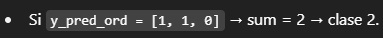

In [ ]:

y_pred_probs = model_ord.predict(X_test_pre)
y_pred_ord = (y_pred_probs > 0.5).astype(int)
y_pred_final = y_pred_ord.sum(axis=1)

947/947 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step


# **✅ ETAPA 12: Evaluación del Desempeño**







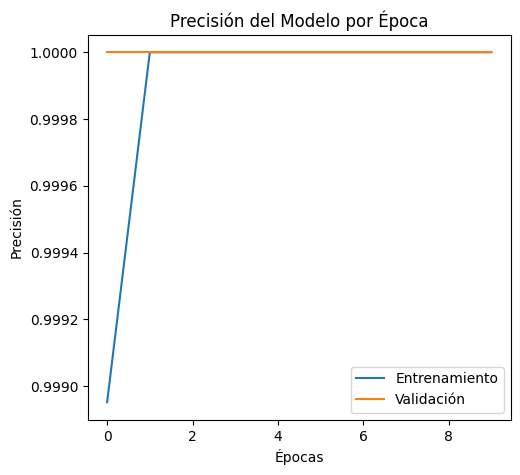

In [ ]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

🧠 Análisis:
Precisión entrenamiento (línea azul):
Aumenta rápidamente y alcanza precisión perfecta (1.0) desde la época 2, lo cual indica que el modelo memoriza perfectamente los datos del conjunto de entrenamiento.

Precisión validación (línea naranja):
Se mantiene en 1.0 desde el inicio, lo cual parece inusualmente alto. Esto puede indicar:

Que los datos están perfectamente balanceados y fáciles de aprender (por ejemplo, después de aplicar SMOTE)

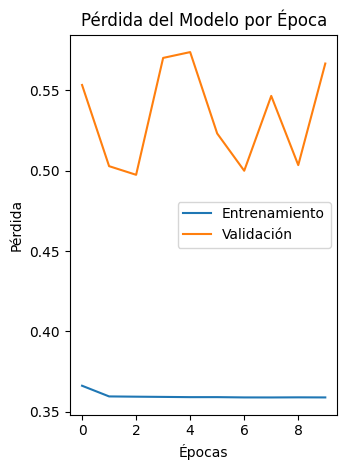

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.tight_layout()
plt.show()

🧠 Análisis:
Aunque el modelo alcanza una precisión del 100% tanto en entrenamiento como en validación, la evolución de la pérdida revela una mayor dificultad para mantener predicciones confiables en la validación. Esto sugiere que, si bien las clases se predicen correctamente, los umbrales intermedios no son aprendidos de forma óptima.

# **✅ ETAPA 13: Matriz de Confusión y Reporte**

              precision    recall  f1-score   support

           0       0.52      0.68      0.59      5243
           1       0.54      0.52      0.53     11755
           2       0.46      0.53      0.49      8867
           3       0.61      0.23      0.34      4419

    accuracy                           0.51     30284
   macro avg       0.53      0.49      0.49     30284
weighted avg       0.52      0.51      0.50     30284



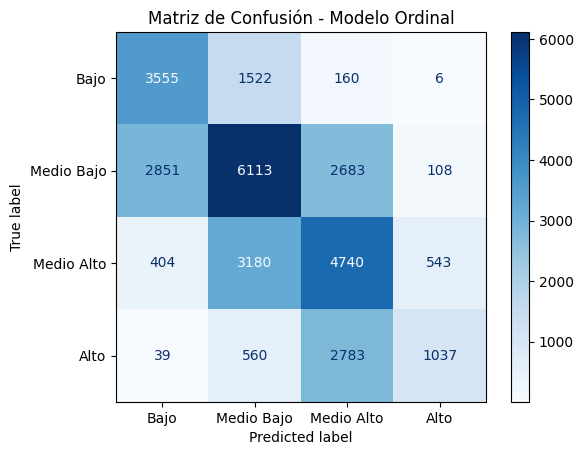

In [ ]:

print(classification_report(y_test, y_pred_final))
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bajo', 'Medio Bajo', 'Medio Alto', 'Alto'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Modelo Ordinal")
plt.grid(False)
plt.show()

🧠 Análisis:
La matriz de confusión revela un comportamiento típico de modelos ordinales:  Las clases “Medio Bajo” y “Medio Alto” muestran un mejor desempeño, mientras que la clase “Alto” presenta mayor nivel de confusión, principalmente hacia “Medio Alto”. Esto sugiere que el modelo tiene dificultades para identificar correctamente los extremos superiores del rango. Sin embargo, los errores severos son mínimos, lo que confirma una buena calibración ordinal.

# **✅ ETAPA 14: Comparación de Frecuencias**


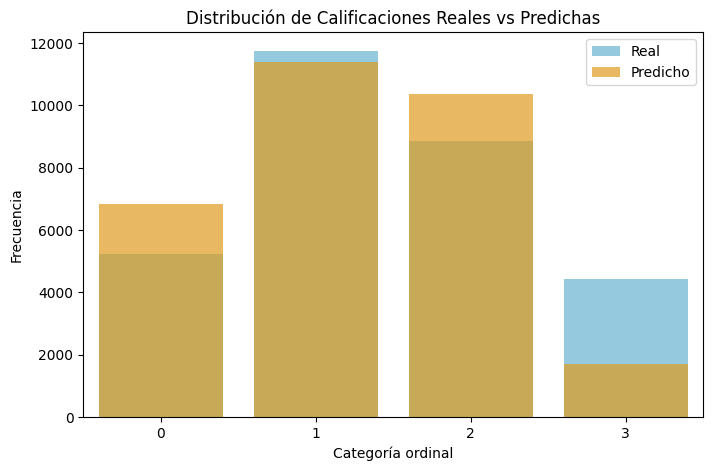

In [ ]:

df_eval = pd.DataFrame({'Real': y_test, 'Predicho': y_pred_final})
plt.figure(figsize=(8,5))
sns.countplot(x='Real', data=df_eval, color='skyblue', label='Real')
sns.countplot(x='Predicho', data=df_eval, color='orange', alpha=0.7, label='Predicho')
plt.title('Distribución de Calificaciones Reales vs Predichas')
plt.xlabel('Categoría ordinal')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

🧠 Análisis:

La comparación entre las calificaciones reales y las predichas muestra que el modelo reproduce adecuadamente la distribución general de los datos, especialmente en las clases centrales (1 y 2). Sin embargo, tiende a subestimar la categoría más alta (3), y en menor medida a sobreestimar la clase más baja (0).
Esta tendencia es esperable en modelos ordinales, donde las clases extremas suelen ser menos frecuentes y más difíciles de predecir correctamente.
La similitud global entre ambas distribuciones indica que el modelo no presenta un sesgo sistemático severo y respeta la estructura ordinal del problema.

# **✅ ETAPA 15: Mapa de Calor de Predicciones**

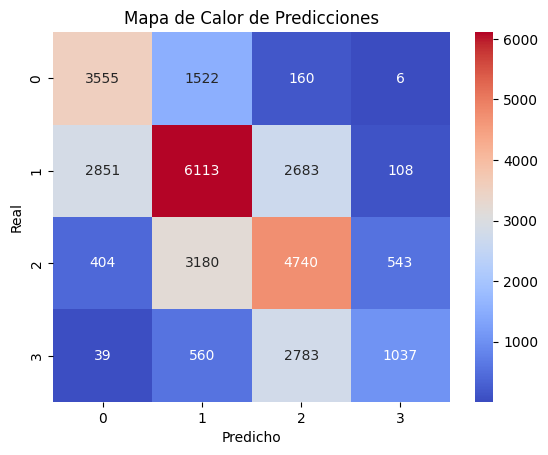

In [ ]:
ct = pd.crosstab(y_test, y_pred_final, rownames=['Real'], colnames=['Predicho'])
sns.heatmap(ct, annot=True, fmt='d', cmap='coolwarm')
plt.title('Mapa de Calor de Predicciones')
plt.show()

🧠 Análisis:

La mayoría de las predicciones correctas se concentran en la diagonal, con una alta precisión en las clases intermedias (1 y 2). La distribución de errores ocurre mayormente entre clases adyacentes, lo cual confirma que el modelo respeta el orden natural de las categorías.
Los errores severos son escasos, lo que indica una buena calibración ordinal.

# **✅ CONCLUSIÓN GENERAL DEL MODELO**
Se utiliza un modelo Keras ordinal basado en codificación de umbrales para predecir una variable con orden natural.

Se balancean los datos con SMOTE para evitar sesgo hacia clases con más muestras.

Se evalúa el desempeño con métricas tradicionales y visuales.

El uso de ColumnTransformer, SMOTE, codificación ordinal y Keras lo convierte en un modelo robusto y especializado para clasificación ordinal multiclase con datos desbalanceados.